In [1]:
from netCDF4 import Dataset
import numpy as np

In [2]:
my_example_nc_file = 'era5_new_corrected.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [3]:
fh.variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [4]:
fh.variables['latitude']

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
fh.variables['time'][0].data

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array(1054800, dtype=int32)

In [6]:
import netCDF4

time = fh.variables['time'] # do not cast to numpy array yet 
time_convert = netCDF4.num2date(time[:], time.units, time.calendar)
time_convert

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  after removing the cwd from sys.path.


masked_array(data=[cftime.DatetimeGregorian(2020, 5, 1, 0, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 5, 1, 1, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 5, 1, 2, 0, 0, 0, has_year_zero=False),
                   ...,
                   cftime.DatetimeGregorian(2020, 8, 31, 21, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 8, 31, 22, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 8, 31, 23, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

# data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
# os.listdir(data_path)[0]

In [8]:
fh.variables['latitude'][1] # latitude mais proxima das boias = -23

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


masked_array(data=-23.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [9]:
fh.variables['longitude'][0] 

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


masked_array(data=-43.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [11]:
dados = []
for i in fh.variables['swh'][:]:
    dados.append(i[1][0])

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [12]:
dados_array = np.asarray(dados)
ee = []
for i in range(len(dados)):
    ee.append(dados_array.mean() + 4*dados_array.std())

In [13]:
import matplotlib.dates as mdates
import datetime

dates = pd.date_range(start="2020-05-01",end="2020-08-31-23", freq = 'H')
# dates = []
# for j in range(2015, 2022):
#     for i in range(1,13):
#         dates.append(datetime.datetime(j, i, 1, 0, 0))

In [14]:
fh.variables['time']

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (2952,)
filling on, default _FillValue of -2147483647 used

In [15]:
time_convert

masked_array(data=[cftime.DatetimeGregorian(2020, 5, 1, 0, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 5, 1, 1, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 5, 1, 2, 0, 0, 0, has_year_zero=False),
                   ...,
                   cftime.DatetimeGregorian(2020, 8, 31, 21, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 8, 31, 22, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2020, 8, 31, 23, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

In [16]:
dates

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 01:00:00',
               '2020-05-01 02:00:00', '2020-05-01 03:00:00',
               '2020-05-01 04:00:00', '2020-05-01 05:00:00',
               '2020-05-01 06:00:00', '2020-05-01 07:00:00',
               '2020-05-01 08:00:00', '2020-05-01 09:00:00',
               ...
               '2020-08-31 14:00:00', '2020-08-31 15:00:00',
               '2020-08-31 16:00:00', '2020-08-31 17:00:00',
               '2020-08-31 18:00:00', '2020-08-31 19:00:00',
               '2020-08-31 20:00:00', '2020-08-31 21:00:00',
               '2020-08-31 22:00:00', '2020-08-31 23:00:00'],
              dtype='datetime64[ns]', length=2952, freq='H')

In [17]:
len(dates)

2952

In [18]:
len(dados)

2952

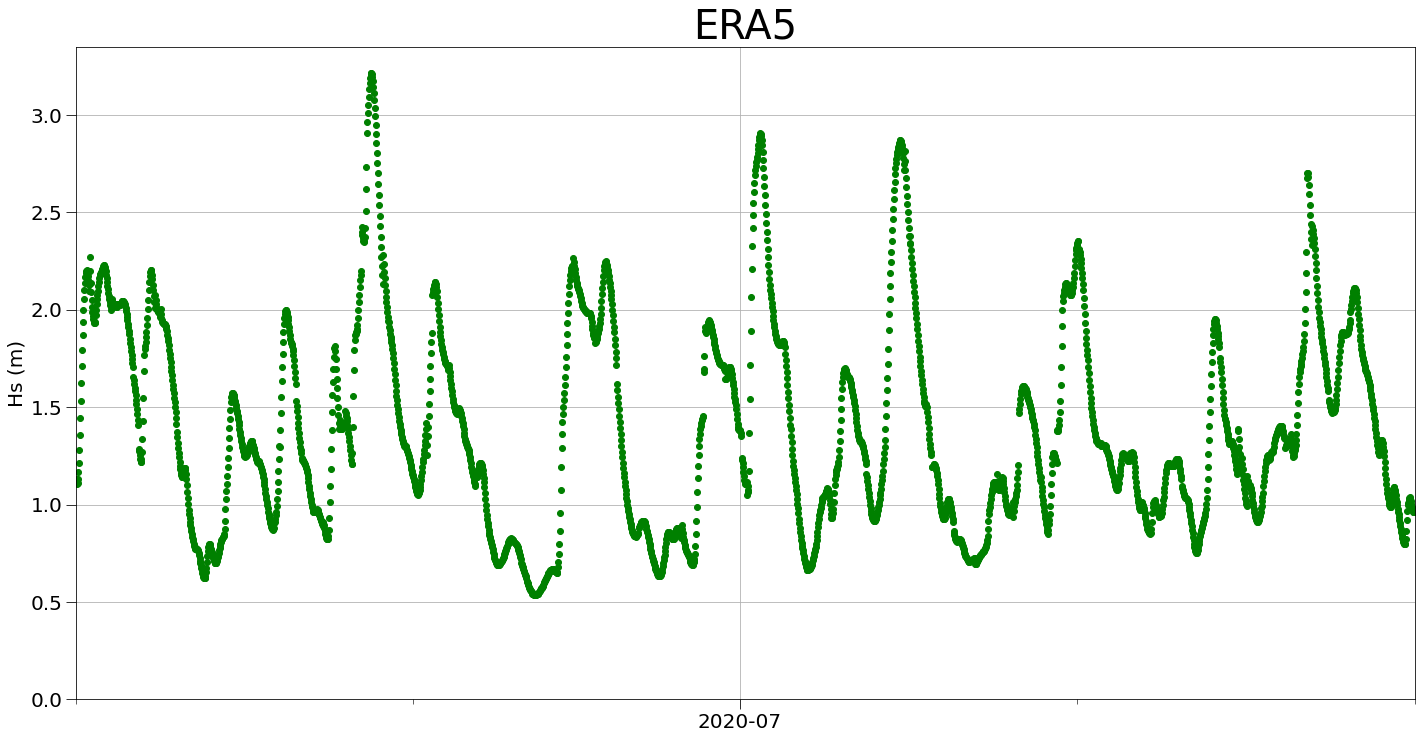

In [19]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dates, dados, marker = 'o', color = 'green', linestyle = 'none')
# ax.plot(dates, ee)
# ax.plot(dado['Hsig'][:], marker = 'o', color = 'springgreen', linestyle = 'none')
# ax.plot(fh.variables['swh'][:][226][634])
# for i in fh.variables['swh'][:]:
    # ax.plot(i[226][634])

# ax.plot(dado['jump_flag'][:], marker = 'o', color = 'darkviolet', linestyle = 'none')
# ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


# ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'blue', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0)
ax.set_xlim(datetime.datetime(2020,5,1), datetime.datetime(2020,9,1))



###########################################################################

plt.title('ERA5', fontsize = 40)



plt.savefig(os.getcwd() +'/fig/reanalise')

In [20]:
from windrose import WindroseAxes

In [21]:
hs = []
for i in fh.variables['swh'][:]:
    hs.append(i[1][0])
    
dp = []
for i in fh.variables['mwd'][:]:
    dp.append(i[1][0])
    
tp = []
for i in fh.variables['pp1d'][:]:
    tp.append(i[1][0])

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` 

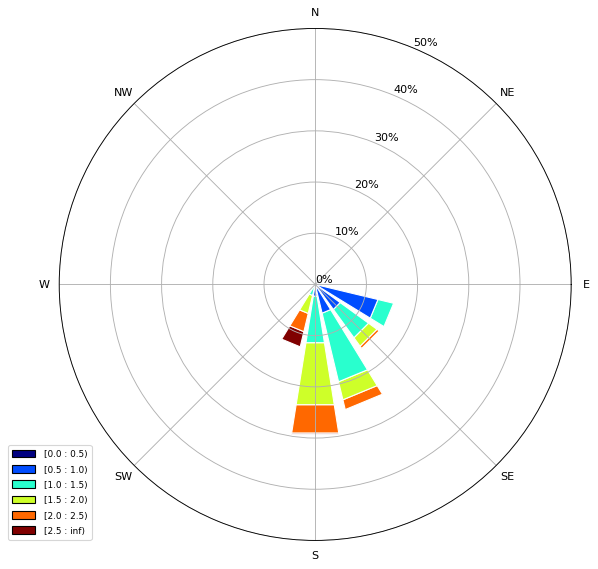

In [22]:
ax = WindroseAxes.from_ax()
ax.bar(dp, hs, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/reanalise_rosaHs')

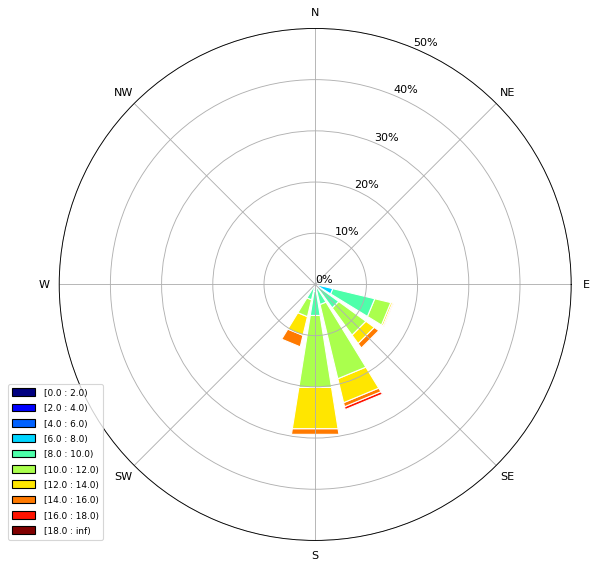

In [23]:
ax = WindroseAxes.from_ax()
ax.bar(dp, tp, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/reanalise_rosaTp')